# Comparing the generated model against multiple datasets

In [1]:
import pandas as pd
from distfit import distfit
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [ ]:
PATH_DIR = './'
os.chdir(PATH_DIR)

In [2]:
# Generated model
PATH = 'Data/Generated users/'
FILE_NAME = 'user_model'

with open(PATH+FILE_NAME+'.dat', "rb") as f:
    model_dict = pickle.load(f)

In [36]:
# Create a table with every parameter

int_attributes = ['friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count', 'created_at']
boolean_columns = ['location', 'verified', 'geo_enabled', 'default_profile', 'default_profile_image', 'protected']

table = {}

for cluster in ['0','1','2','3']:

    table['Cluster '+cluster] = {}

    for attr in int_attributes:

        model = model_dict[cluster][attr]

        name = model.summary['name'][0]
        params = model.summary['params'][0]

        table['Cluster '+cluster][attr] = {}
        table['Cluster '+cluster][attr]['Distribution'] = name

        if (len(params) == 2):
            table['Cluster '+cluster][attr]['Parameters'] = "loc = "+str(np.round(params[0],4))+", scale = "+str(np.round(params[1],4))
        elif (len(params) == 4):
            table['Cluster '+cluster][attr]['Parameters'] = "a = "+str(np.round(params[0],4))+", b = "+str(np.round(params[1],4))+", loc = "+str(np.round(params[1],4))+", scale = "+str(np.round(params[2],4))
        else:
            if (name == 'pareto'):
                start = "b = "
            elif (name == 'gamma'):
                start = "a = "
            elif (name == 'lognorm'):
                start = "s = "
            else:
                start = "c = "

            table['Cluster '+cluster][attr]['Parameters'] = start+str(np.round(params[0],4))+", loc = "+str(np.round(params[1],4))+", scale = "+str(np.round(params[2],4))
    
    for attr in boolean_columns:

        model = model_dict[cluster][attr]

        name = "binomial"
        n = model_dict[cluster][attr]['n']
        p = model_dict[cluster][attr]['p']

        table['Cluster '+cluster][attr] = {}
        table['Cluster '+cluster][attr]['Distribution'] = name
        table['Cluster '+cluster][attr]['Parameters'] = "n = "+str(np.round(n,6))+", p = "+str(np.round(p,6))

df_table = pd.DataFrame.from_dict(table, orient="index").stack().to_frame()
df_table = pd.DataFrame(df_table[0].values.tolist(), index=df_table.index)

df_table

Distribution  \
Cluster 0 friends_count               pareto   
          followers_count              expon   
          listed_count                  beta   
          favourites_count            pareto   
          statuses_count               gamma   
          created_at                dweibull   
          location                  binomial   
          verified                  binomial   
          geo_enabled               binomial   
          default_profile           binomial   
          default_profile_image     binomial   
          protected                 binomial   
Cluster 1 friends_count              lognorm   
          followers_count            lognorm   
          listed_count                 gamma   
          favourites_count              beta   
          statuses_count             lognorm   
          created_at                    beta   
          location                  binomial   
          verified                  binomial   
          geo_enabled               binomial   
          default_profile           binomial   
          default_profile_image     binomial   
          protected                 binomial   
Cluster 2 friends_count              lognorm   
          followers_count             pareto   
          listed_count               lognorm   
          favourites_count            pareto   
          statuses_count                beta   
          created_at                    beta   
          location                  binomial   
          verified                  binomial   
          geo_enabled               binomial   
          default_profile           binomial   
          default_profile_image     binomial   
          protected                 binomial   
Cluster 3 friends_count              lognorm   
          followers_count            lognorm   
          listed_count            genextreme   
          favourites_count              beta   
          statuses_count                beta   
          created_at                    beta   
          location                  binomial   
          verified                  binomial   
          geo_enabled               binomial   
          default_profile           binomial   
          default_profile_image     binomial   
          protected                 binomial   

                                                                        Parameters  
Cluster 0 friends_count              b = 0.5921, loc = -216.0752, scale = 216.0752  
          followers_count                   loc = 8191276.0, scale = 27185090.6721  
          listed_count           a = 2.5646, b = 62198050956.0848, loc = 621980...  
          favourites_count           b = 0.9421, loc = -972.7861, scale = 972.7861  
          statuses_count              a = 0.7092, loc = 738.0, scale = 178912.8623  
          created_at                   c = 1.4791, loc = 2008.4383, scale = 1.2639  
          location                                             n = 1, p = 0.704918  
          verified                                                  n = 1.0, p = 1  
          geo_enabled                                          n = 1, p = 0.606557  
          default_profile                                           n = 0.0, p = 1  
          default_profile_image                                     n = 0.0, p = 1  
          protected                                                 n = 0.0, p = 1  
Cluster 1 friends_count                s = 1.7187, loc = -5.0428, scale = 308.4593  
          followers_count                s = 3.3019, loc = -0.006, scale = 342.174  
          listed_count                      a = 0.0131, loc = -0.0, scale = 1.5663  
          favourites_count       a = 0.5103, b = 1.8646, loc = 1.8646, scale = ...  
          statuses_count              s = 2.1642, loc = -10.6223, scale = 4528.379  
          created_at             a = 0.7492, b = 0.3378, loc = 0.3378, scale = ...  
          location                                             n

## Original dataset

In [3]:
PATH = 'Data/Original dataset 11-2022/'
FILE_NAME = 'clustered_users_'

df = {}

for i in range(4):
    df[str(i)] = pd.read_excel(PATH+FILE_NAME+str(i)+'.xlsx')

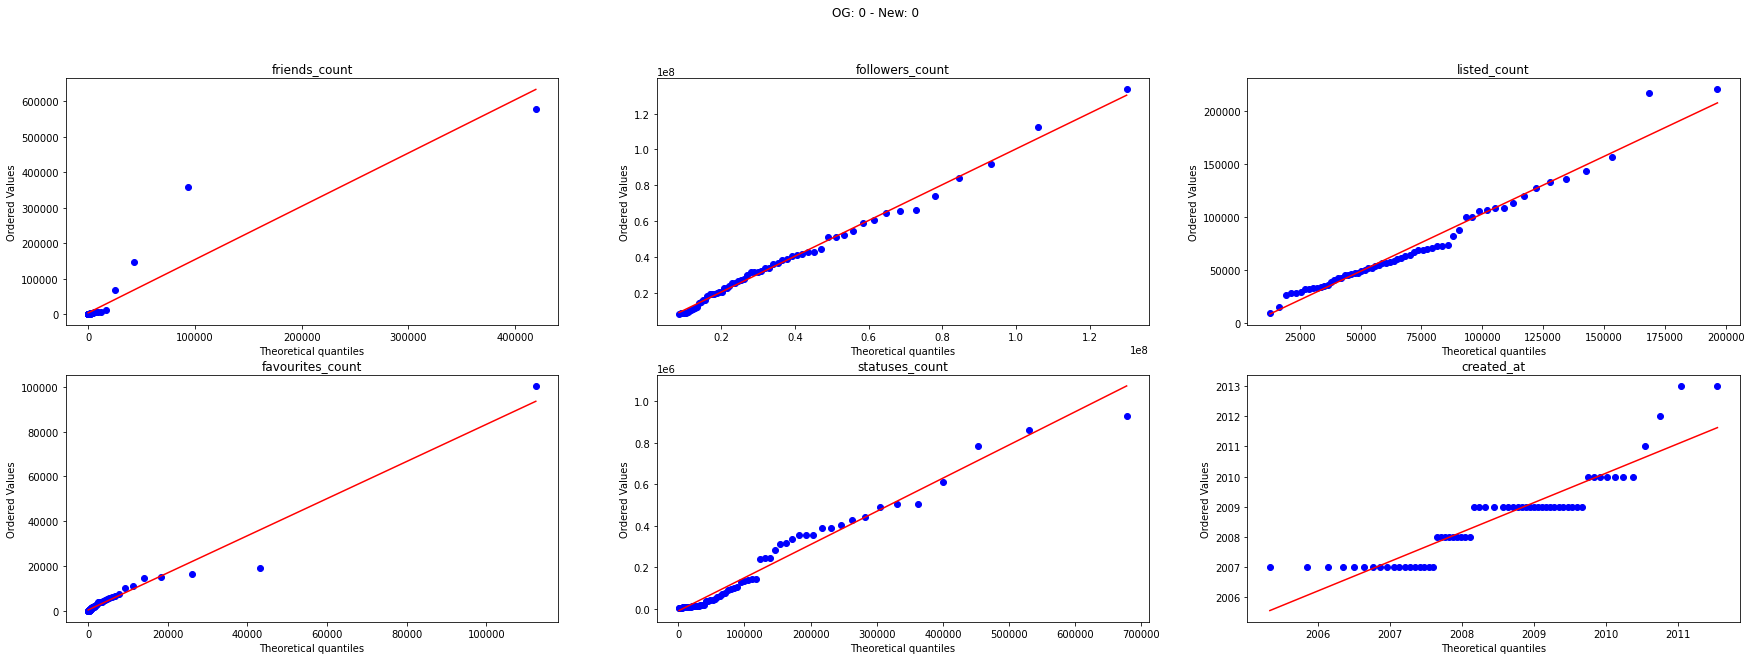

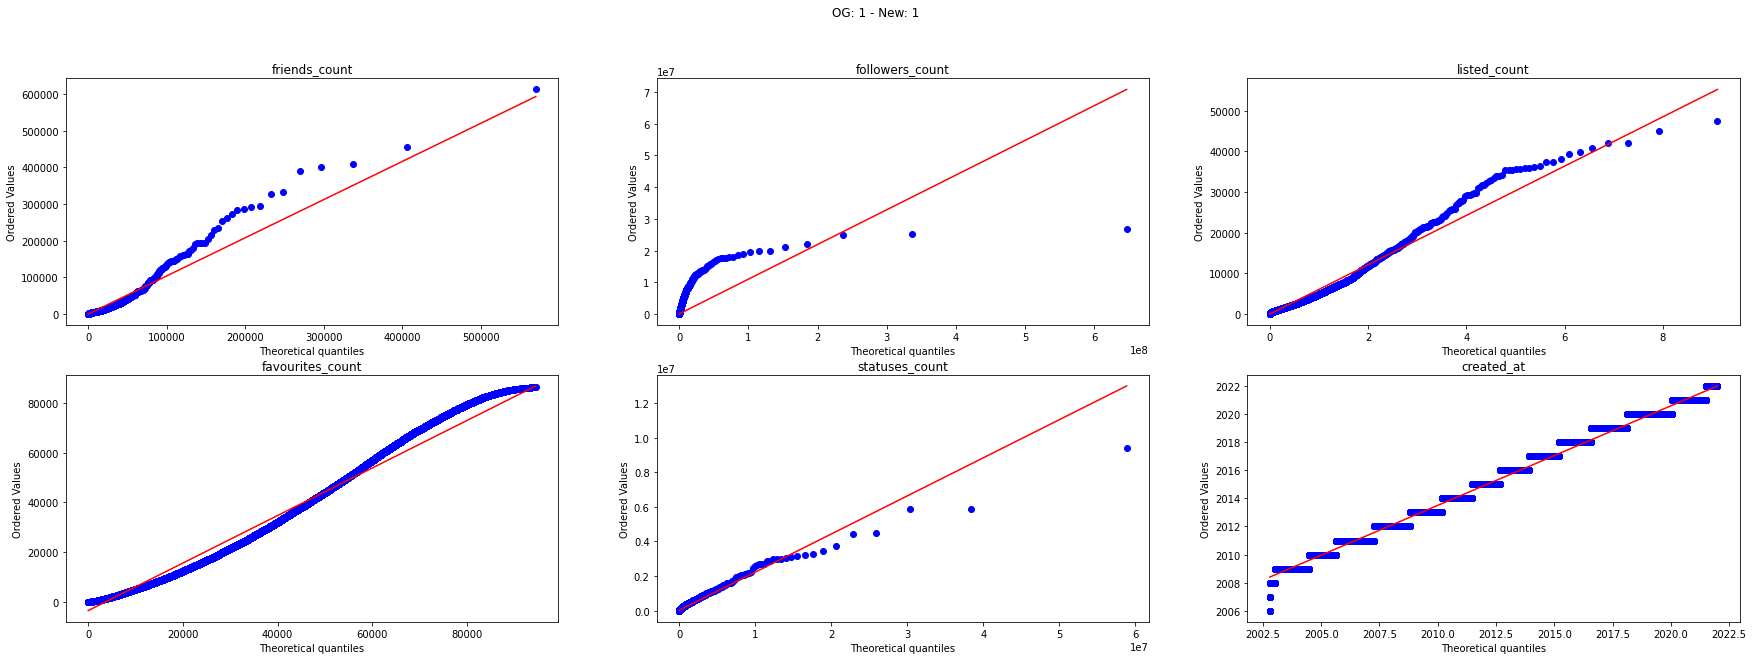

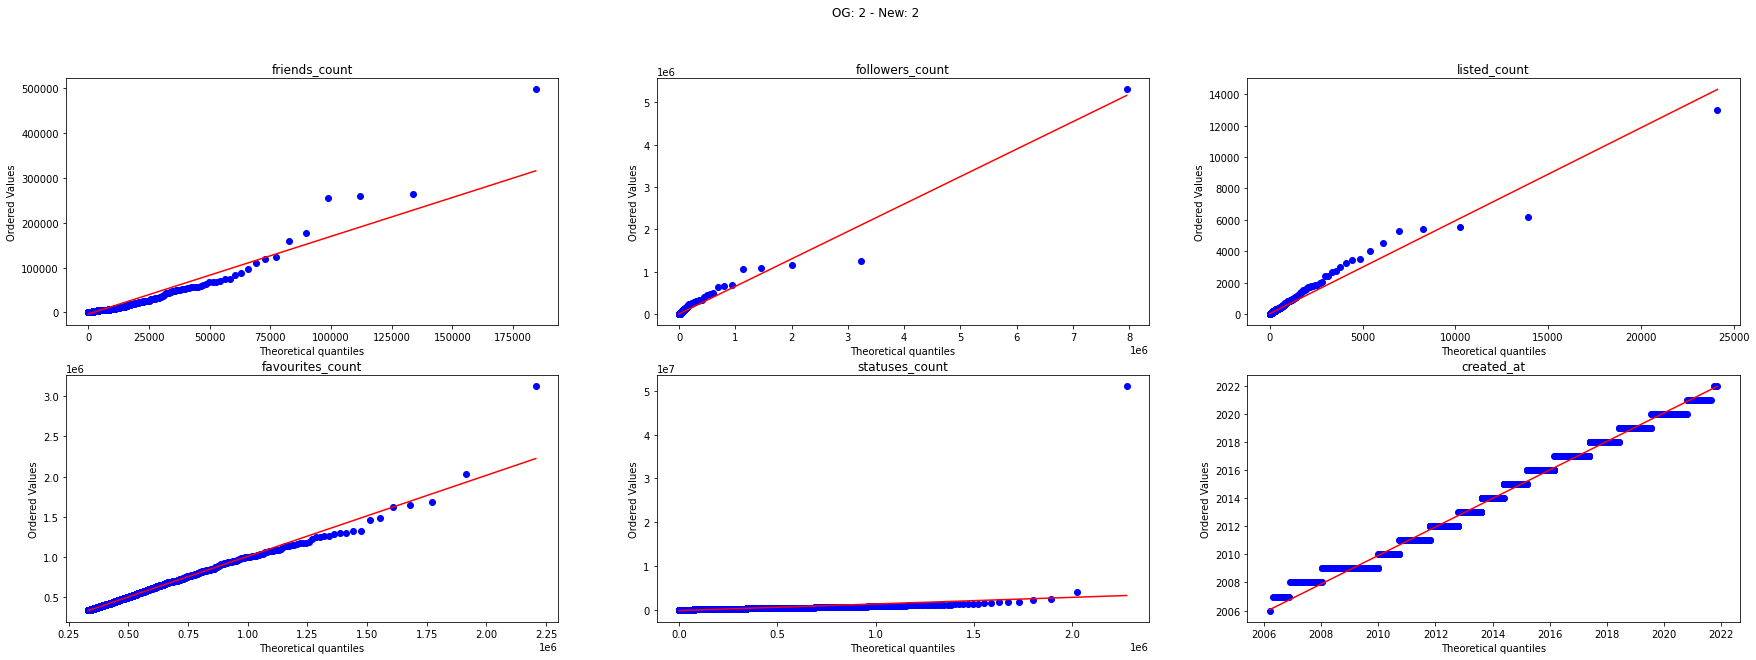

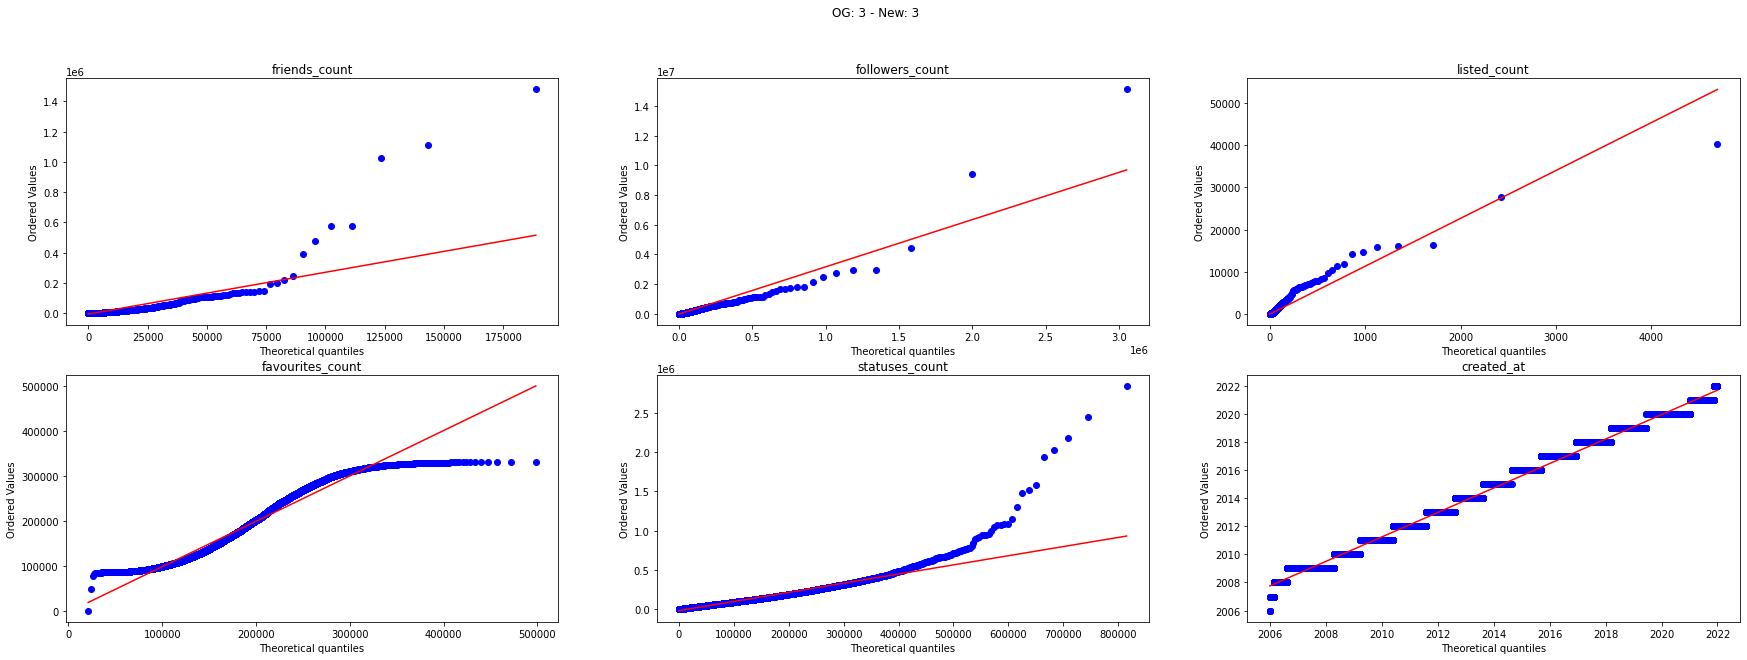

In [7]:
int_attributes = ['friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count', 'created_at']

for cl1,cl2 in zip(['0','1','2','3'], ['0','1','2','3']):
    fig, ax = plt.subplots(2,3, figsize=(30,10))
    i = 0
    j = 0
    for attr in int_attributes:

        if (j > 2):
            i = 1
            j = 0

        model = model_dict[cl1][attr]

        name = model.summary['name'][0]
        params = model.summary['params'][0]

        try:
            stats.probplot(df[cl2][attr], dist=name, sparams=params, plot=ax[i][j])
        except:
            stats.probplot(df[cl2][attr], dist=name, sparams=(params[1], params[2]), plot=ax[i][j])
        ax[i][j].set_title(attr)
        j += 1
    fig.suptitle("OG: "+str(cl1)+" - New: "+str(cl2))
    fig.show()

## Second dataset

In [3]:
PATH = 'Data/Second dataset 11-2022/'
FILE_NAME = 'clustered_users_'

df = {}

for i in range(4):
    df[str(i)] = pd.read_excel(PATH+FILE_NAME+str(i)+'.xlsx')

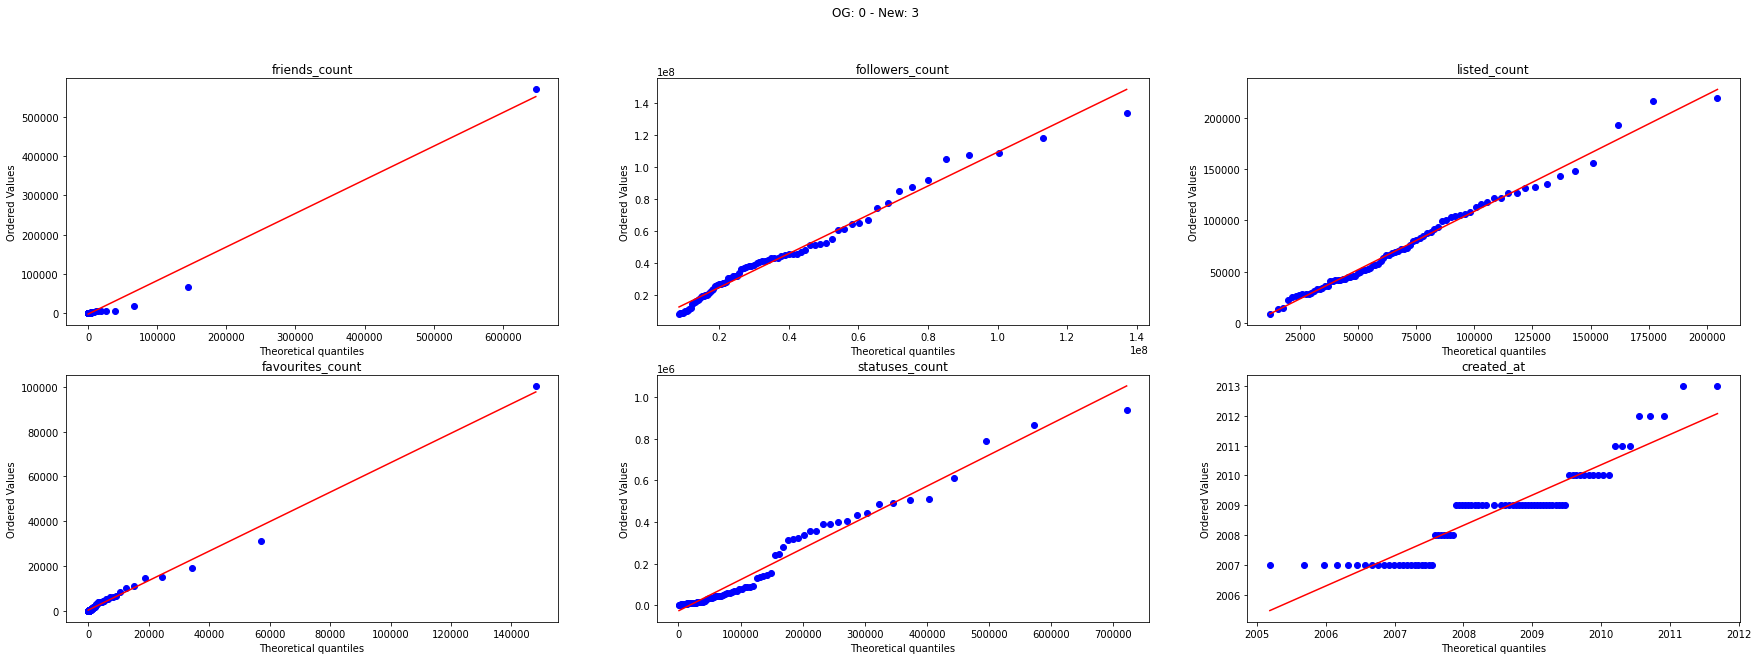

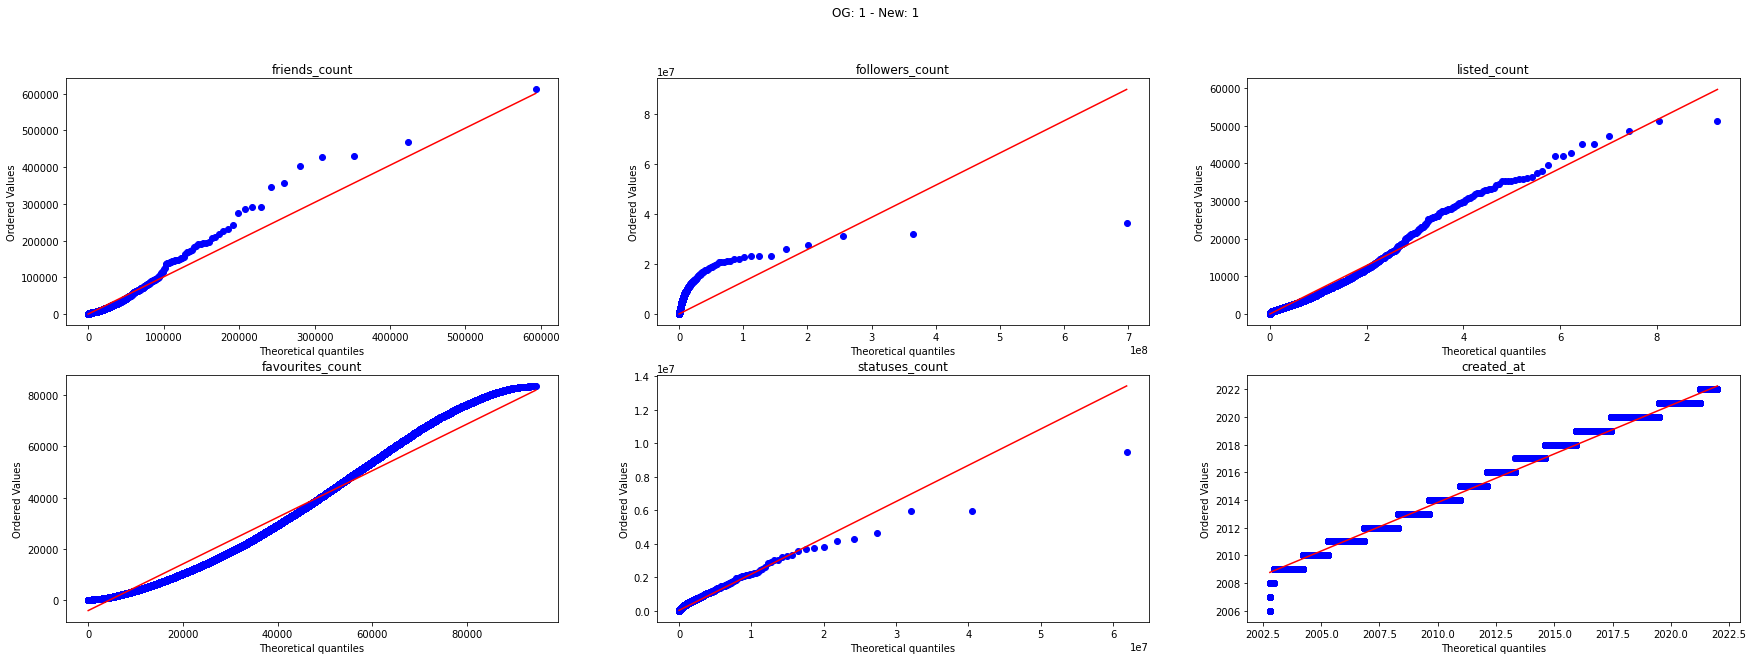

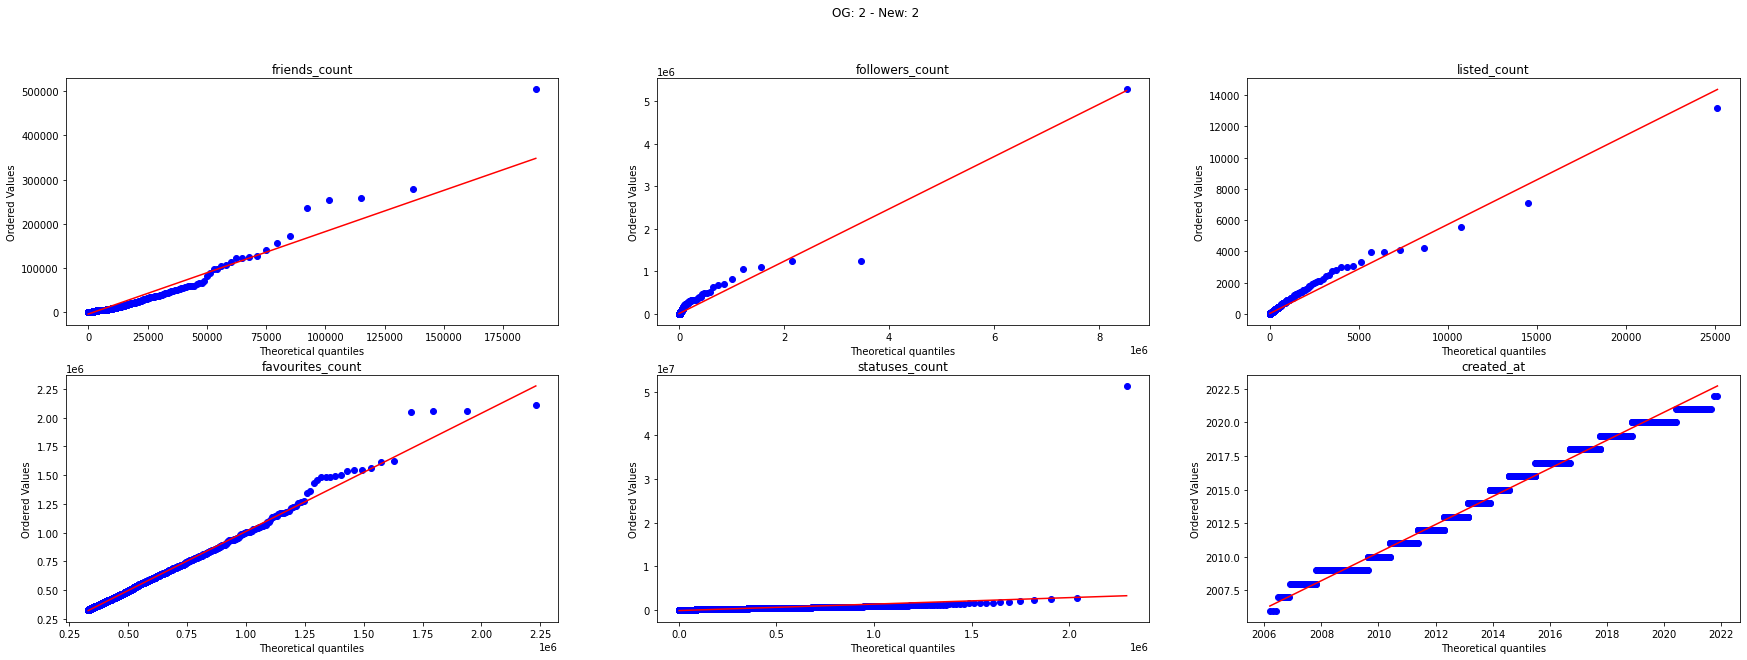

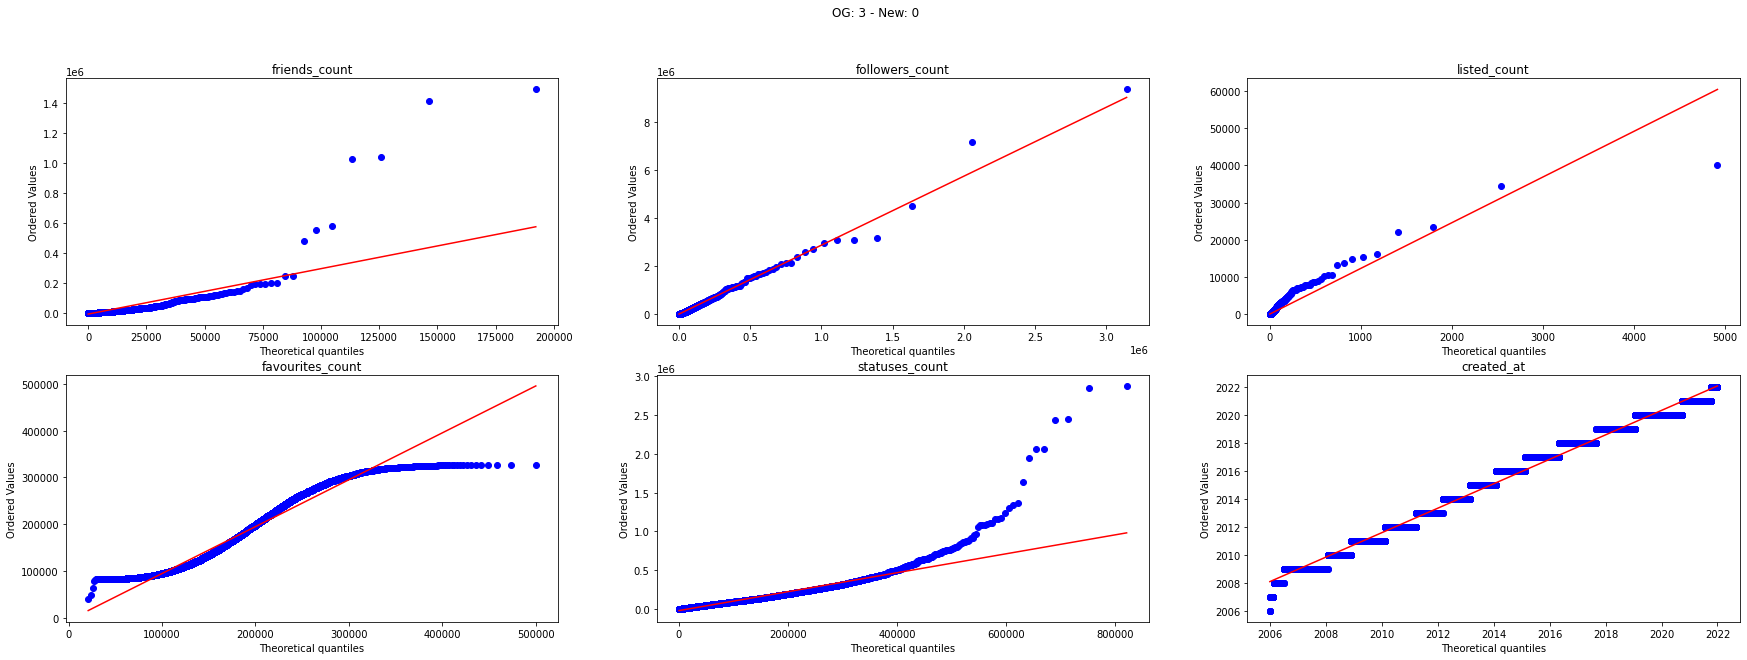

In [11]:
int_attributes = ['friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count', 'created_at']

for cl1,cl2 in zip(['0','1','2','3'], ['3','1','2','0']):
    fig, ax = plt.subplots(2,3, figsize=(30,10))
    i = 0
    j = 0
    for attr in int_attributes:

        if (j > 2):
            i = 1
            j = 0

        model = model_dict[cl1][attr]

        name = model.summary['name'][0]
        params = model.summary['params'][0]

        try:
            stats.probplot(df[cl2][attr], dist=name, sparams=params, plot=ax[i][j])
        except:
            stats.probplot(df[cl2][attr], dist=name, sparams=(params[1], params[2]), plot=ax[i][j])
        ax[i][j].set_title(attr)
        j += 1
    fig.suptitle("OG: "+str(cl1)+" - New: "+str(cl2))
    fig.show()

## Generated users (before clustering)

In [4]:
PATH = 'Data/Generated users/'
FILE_NAME = 'generated_users_'

df = {}

for i in range(4):
    df[str(i)] = pd.read_excel(PATH+FILE_NAME+str(i)+'.xlsx')

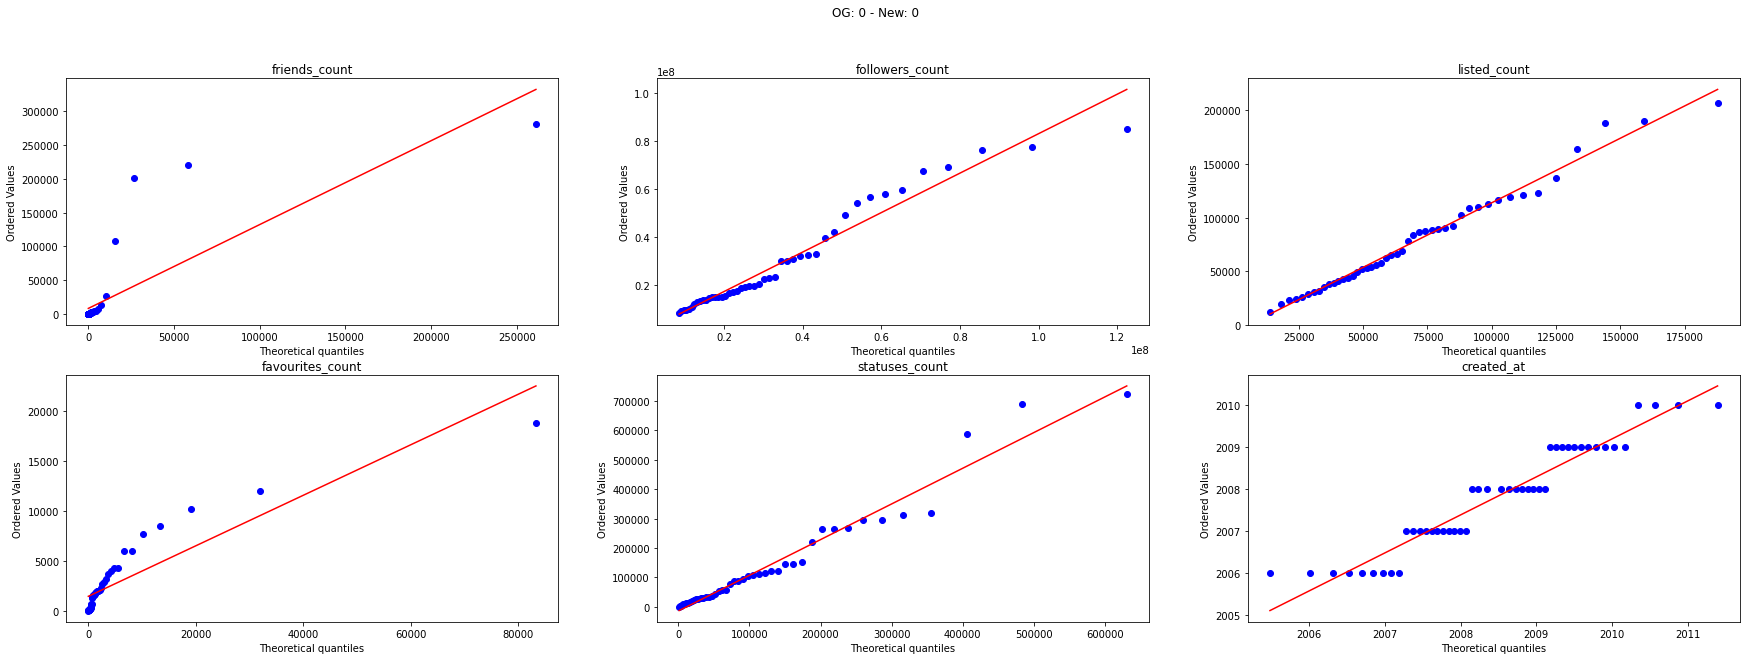

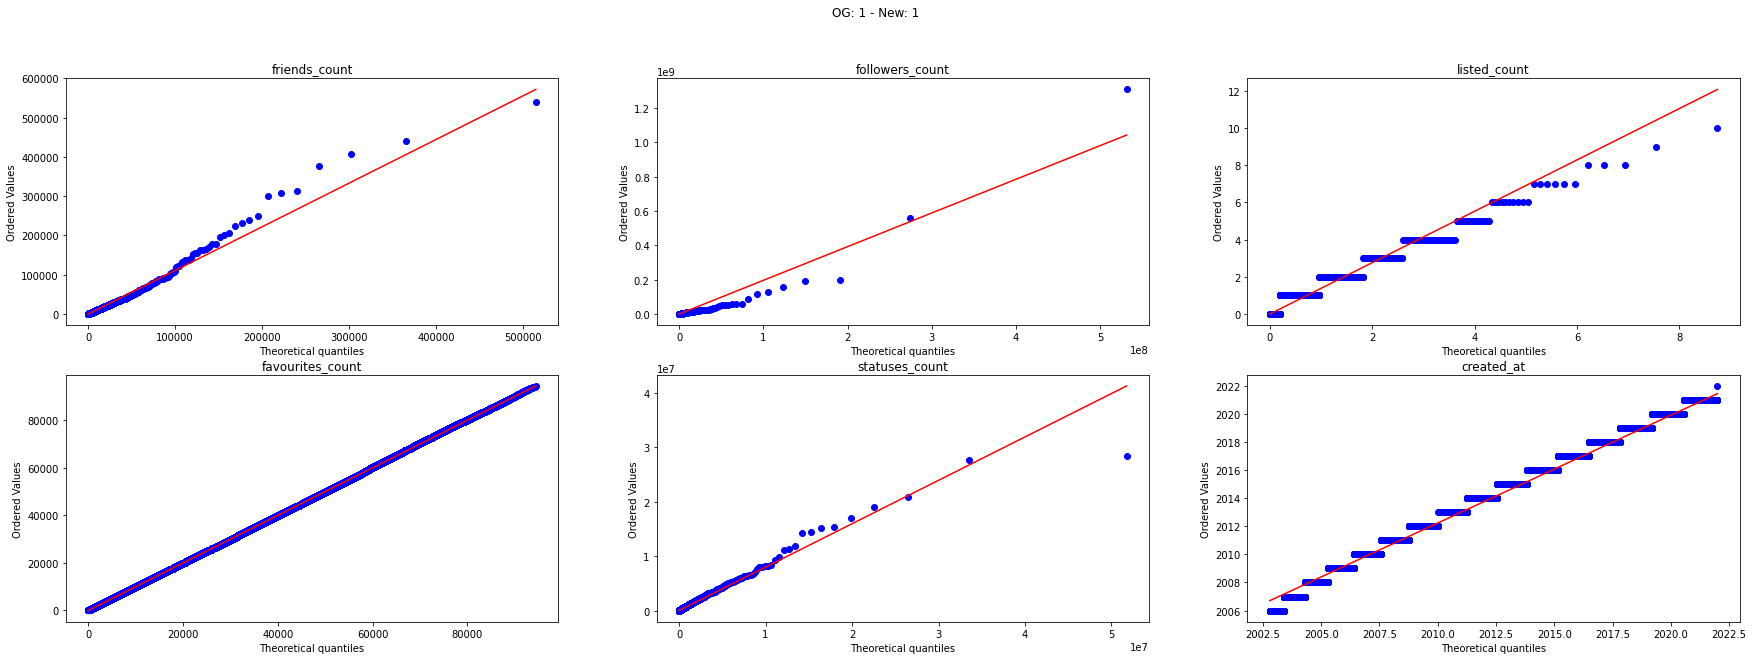

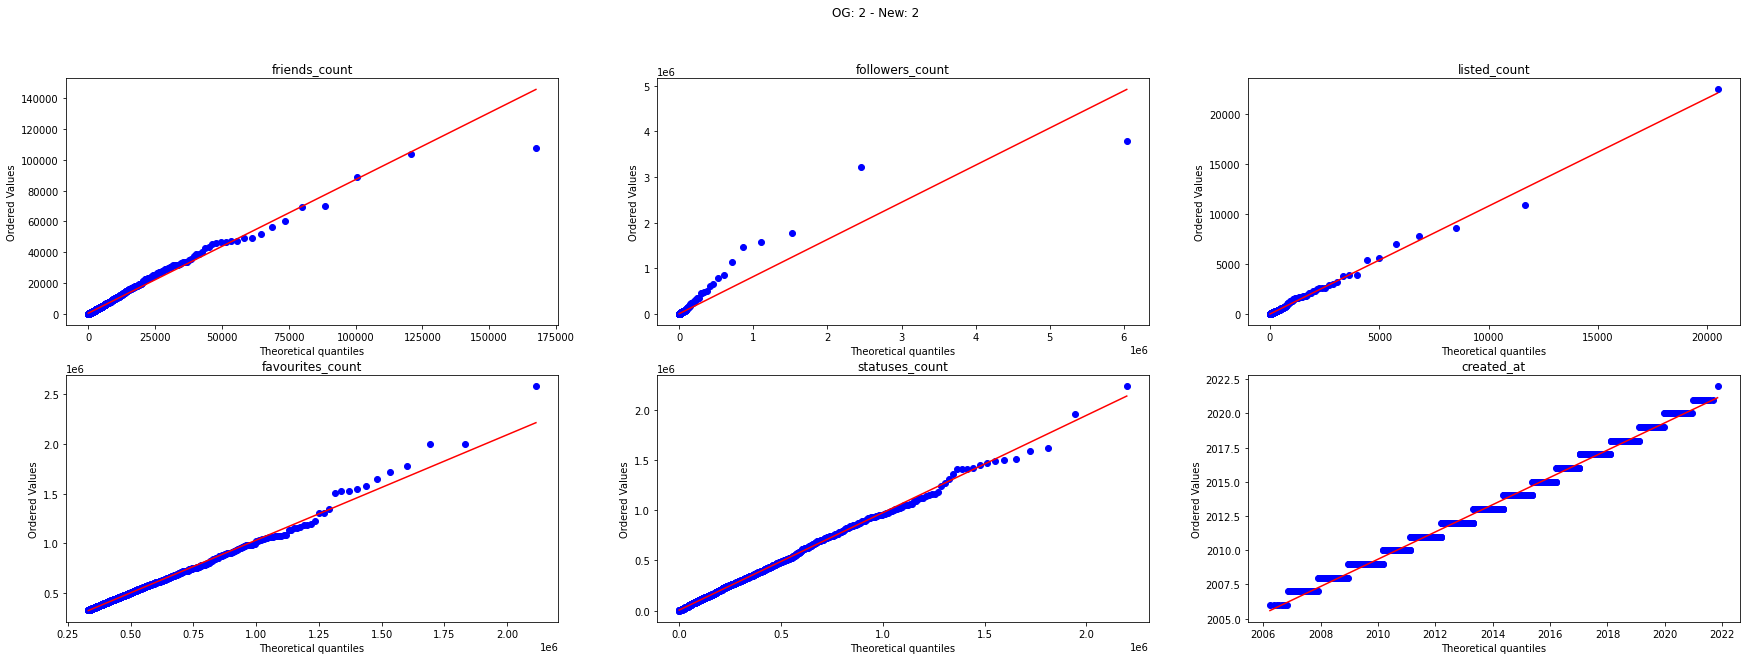

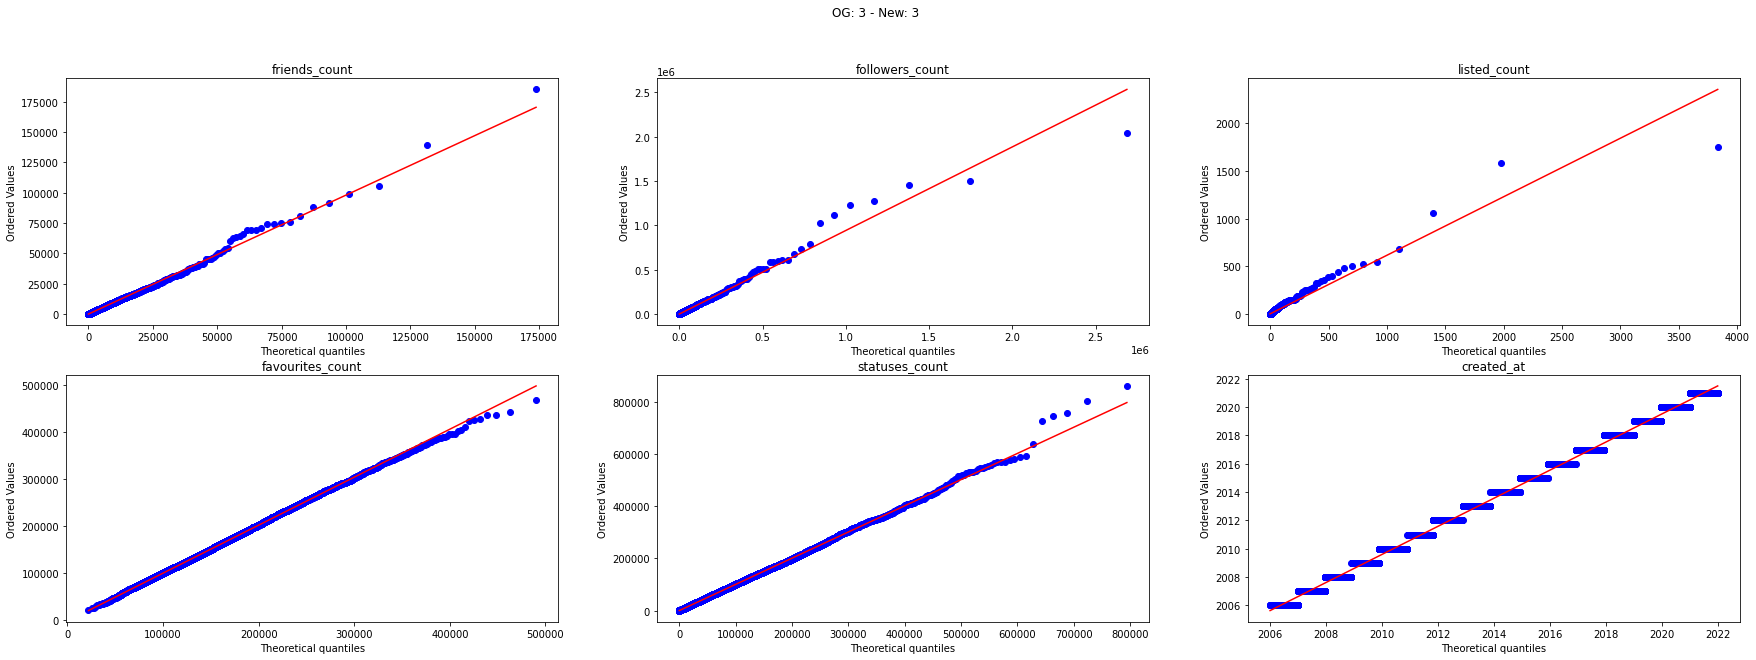

In [5]:
int_attributes = ['friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count', 'created_at']

for cl1,cl2 in zip(['0','1','2','3'], ['0','1','2','3']):
    fig, ax = plt.subplots(2,3, figsize=(30,10))
    i = 0
    j = 0
    for attr in int_attributes:

        if (j > 2):
            i = 1
            j = 0

        model = model_dict[cl1][attr]

        name = model.summary['name'][0]
        params = model.summary['params'][0]

        try:
            stats.probplot(df[cl2][attr], dist=name, sparams=params, plot=ax[i][j])
        except:
            stats.probplot(df[cl2][attr], dist=name, sparams=(params[1], params[2]), plot=ax[i][j])
        ax[i][j].set_title(attr)
        j += 1
    fig.suptitle("OG: "+str(cl1)+" - New: "+str(cl2))
    fig.show()

## Generated users (after clustering)

In [6]:
PATH = 'Data/Generated users/'
FILE_NAME = 'clustered_generated_users_'

df = {}

for i in range(4):
    df[str(i)] = pd.read_excel(PATH+FILE_NAME+str(i)+'.xlsx')

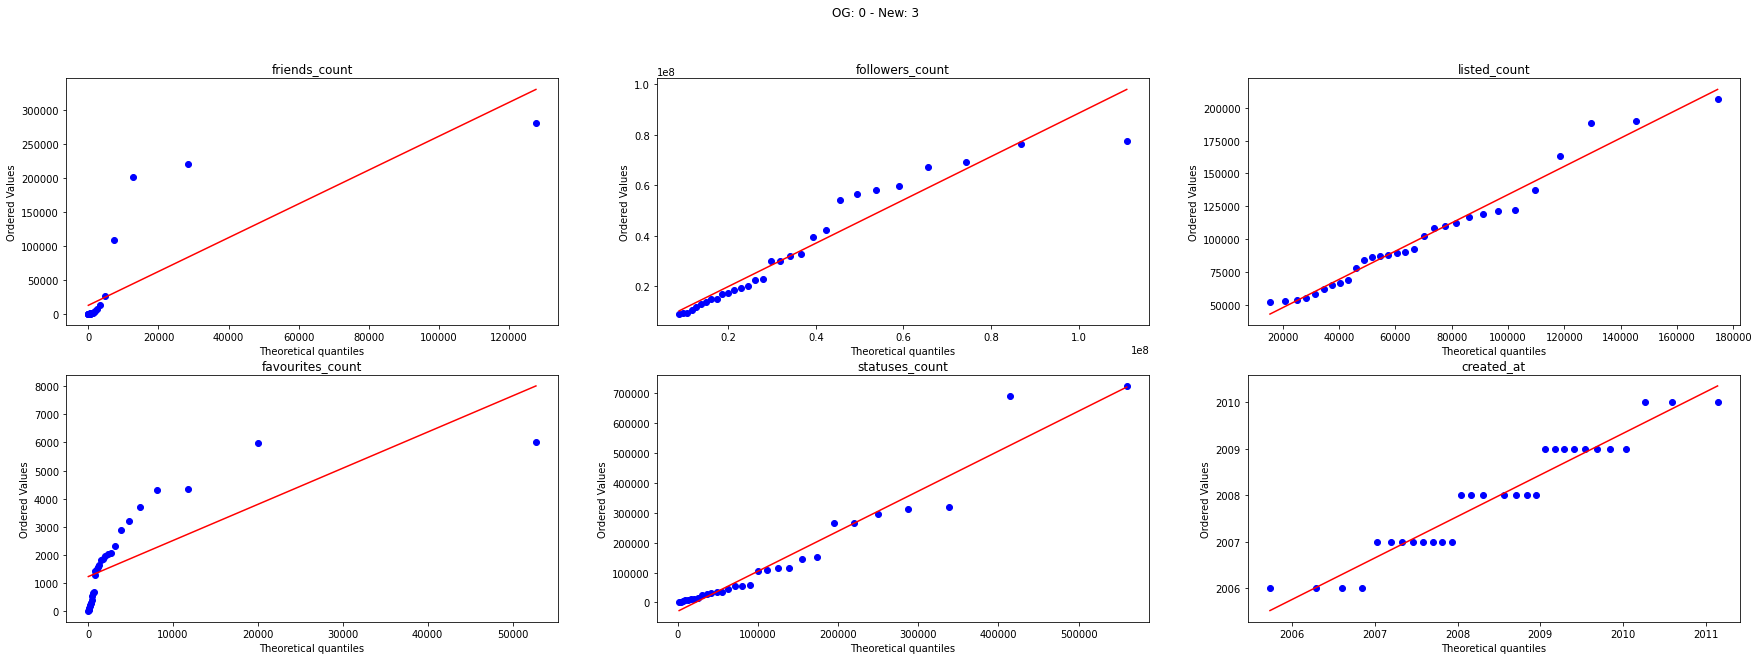

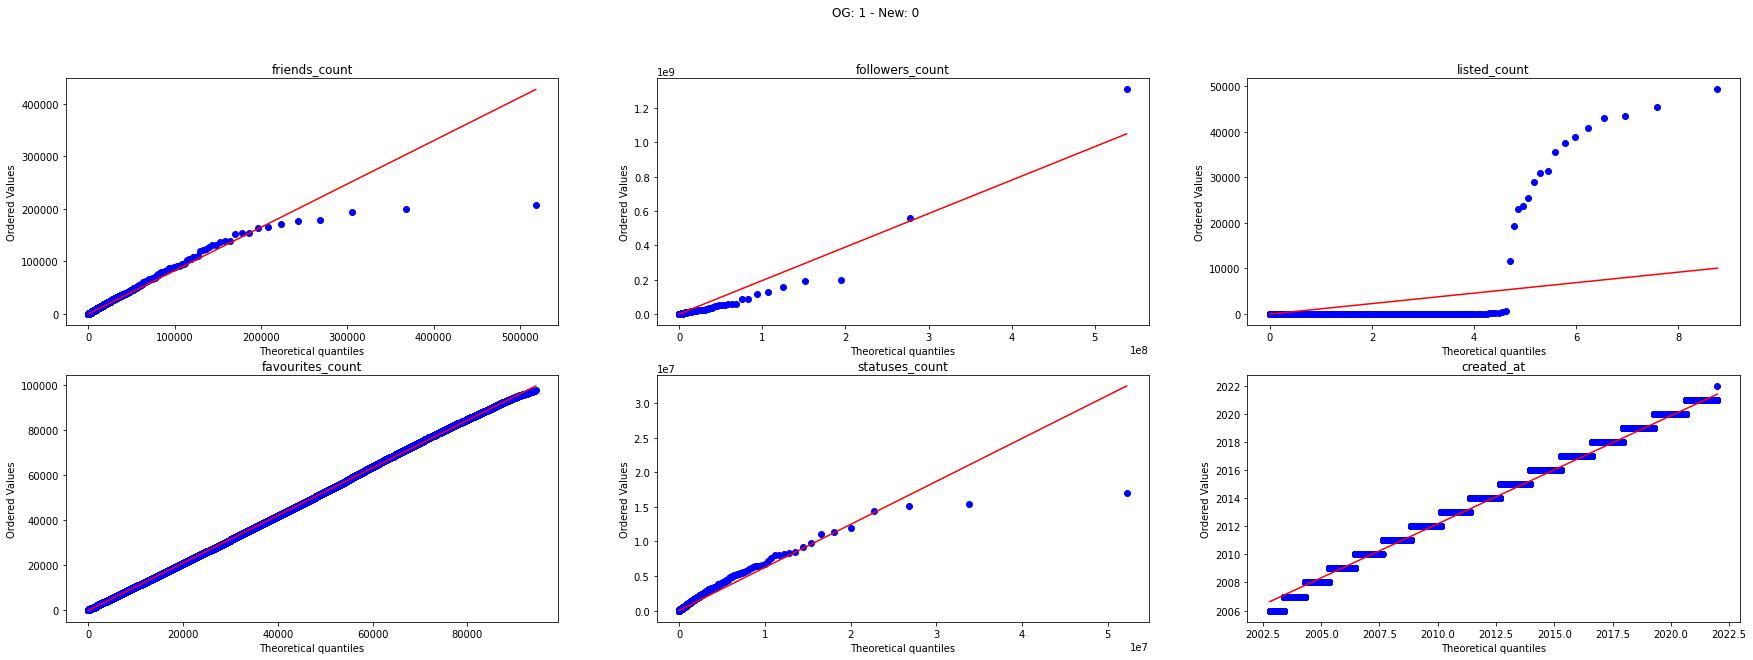

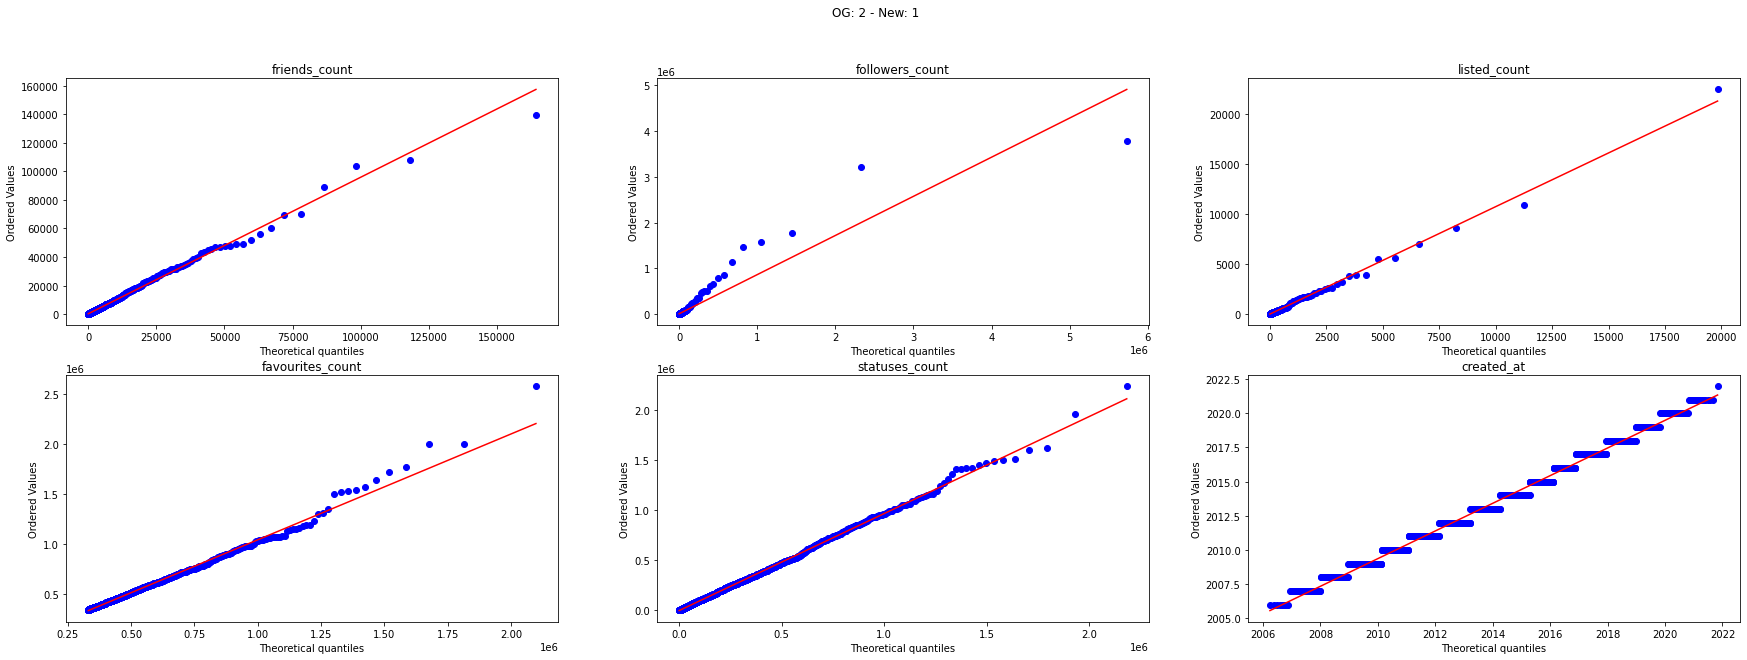

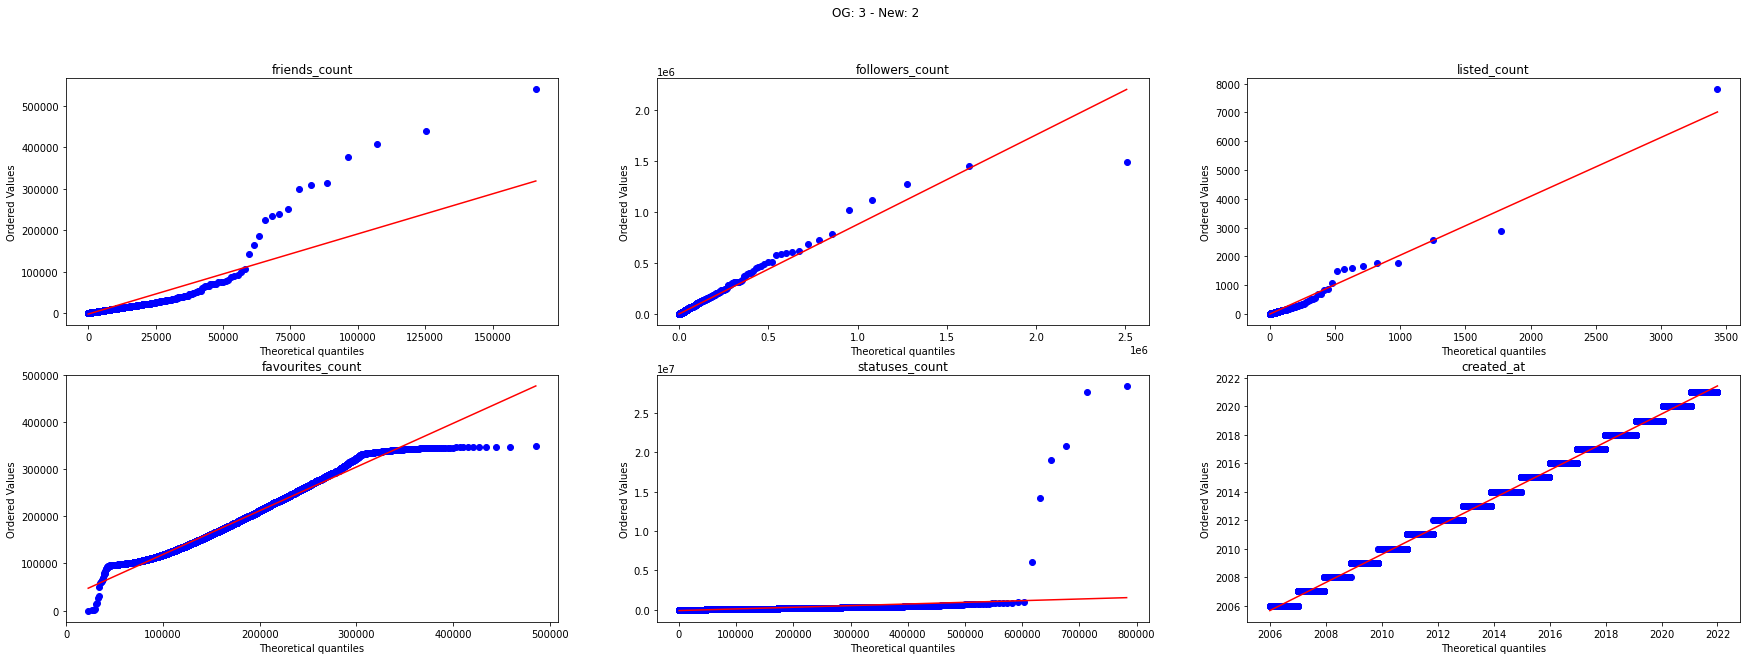

In [7]:
int_attributes = ['friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count', 'created_at']

for cl1,cl2 in zip(['0','1','2','3'], ['3','0','1','2']):
    fig, ax = plt.subplots(2,3, figsize=(30,10))
    i = 0
    j = 0
    for attr in int_attributes:

        if (j > 2):
            i = 1
            j = 0

        model = model_dict[cl1][attr]

        name = model.summary['name'][0]
        params = model.summary['params'][0]

        try:
            stats.probplot(df[cl2][attr], dist=name, sparams=params, plot=ax[i][j])
        except:
            stats.probplot(df[cl2][attr], dist=name, sparams=(params[1], params[2]), plot=ax[i][j])
        ax[i][j].set_title(attr)
        j += 1
    fig.suptitle("OG: "+str(cl1)+" - New: "+str(cl2))
    fig.show()